# Getting the Mushroom Data

First, I import the modules needed to grab the data and create the dataframes and their plots. I am using both a matplot and a seaborn plot and have imported both.  

The pd.read_csv does a good job of creating the dataframe, selecting the columns I need and setting the column headers.


In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

mushrooms = pd.read_csv(url, header=None, usecols=(0,5,21))
mushrooms.columns = ['mr_class', 'odor', 'population']
mushrooms.head()

,mr_class,odor,population
0,p,p,s
1,e,a,n
2,e,l,n
3,p,p,s
4,e,n,a


## Mushroom Data Dictionary and Conversion Keys

To help decipher the coding and assigning numeric values, I copied the data dictionary definitions an assigned numeric values to each code. The plots use the Class,  Odor and Population columns.

    
### Numeric Assignments

### class
- edible=e=0
- poisonous=p=1
    
### odor
- almond=a=0
- anise=l=1
- creosote=c=2
- fishy=y=3
- foul=f=4
- musty=m=5
- none=n=6
- pungent=p=7
- spicy=s=8

### population
- abundant=a=0
- clustered=c=1
- numerous=n=2
- scattered=s=3
- several=v=4
- solitary=y=5

## Replacing codes with Numeric Values

This code updates the columns with the numeric values of each code for each column.

In [45]:
#Updates the class column
mushrooms['mr_class'].replace('e', 0, inplace=True)
mushrooms['mr_class'].replace('p', 1, inplace=True)

#Updates the odor column
mushrooms['odor'].replace('a', 0, inplace=True)
mushrooms['odor'].replace('l', 1, inplace=True)
mushrooms['odor'].replace('c', 2, inplace=True)
mushrooms['odor'].replace('y', 3, inplace=True)
mushrooms['odor'].replace('f', 4, inplace=True)
mushrooms['odor'].replace('m', 5, inplace=True)
mushrooms['odor'].replace('n', 6, inplace=True)
mushrooms['odor'].replace('p', 7, inplace=True)
mushrooms['odor'].replace('s', 8, inplace=True)

#Updates the population column
mushrooms['population'].replace('a', 0, inplace=True)
mushrooms['population'].replace('c', 1, inplace=True)
mushrooms['population'].replace('n', 2, inplace=True)
mushrooms['population'].replace('s', 3, inplace=True)
mushrooms['population'].replace('v', 4, inplace=True)
mushrooms['population'].replace('y', 5, inplace=True)

mushrooms.head()


,mr_class,odor,population
0,1,7,3
1,0,0,2
2,0,1,2
3,1,7,3
4,0,6,0


# Histogram Plots


We'll create the histogram plots to show the distribution of each feature (column).

The first histogram shows the distribution between the edible and poisonous mushrooms.  As you can see, the distribution between the edible and poisonous mushrooms is roughly even with edible mushrooms only slightly more available in the data set than poisonous ones. 

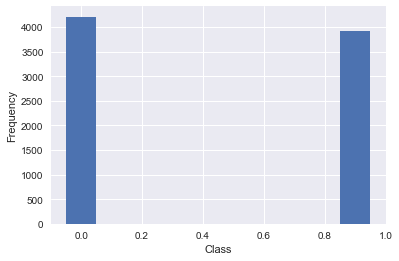

In [46]:
mush_distribution = mushrooms['mr_class'].plot.hist(align='left')
mush_distribution.set_xlabel('Class')
plt.show()

The second histrogram show the distribution of the odors feature.  Mushrooms with no odor (6) and a foul ordor (4) were the most common smells.

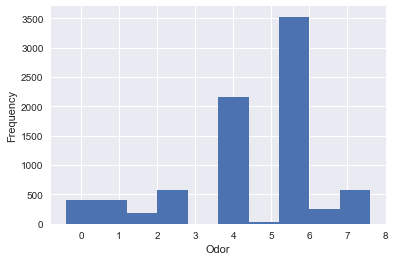

In [47]:
mush_distribution = mushrooms['odor'].plot.hist(align='left')
mush_distribution.set_xlabel('Odor')
plt.show()

The third histogram shows the distribution of mushroom populations.  Most of the mushrooms were found in the 'several' groupings with solitary being the second most common.

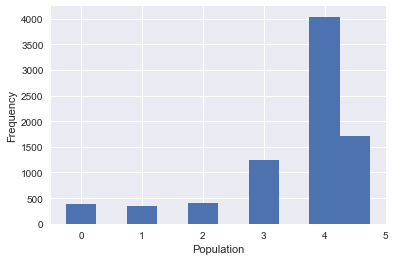

In [48]:
mush_distribution = mushrooms['population'].plot.hist(align='left')
mush_distribution.set_xlabel('Population')
plt.show()

## Seaborn Scatter Plot with Trend Line

For the scatterplot, I found the seaborn plot to be a bit more revealing that the standard Matplt (if only because I couldn't get the subplot trendline code working properly).

This scatterplot shows the relationship between odor, population and whether the mushroom is edible or poisonous.

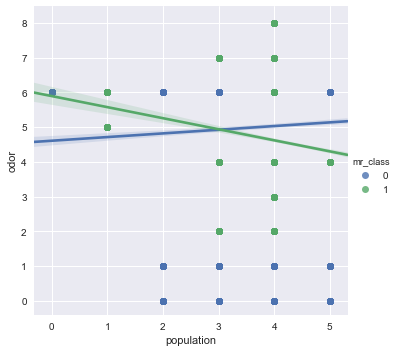

In [49]:
sns.lmplot(x='population', y='odor', hue='mr_class', data=mushrooms);

## Conclusion & Hypothesis

Based on this scatterplot showing the relationship between this features, I predict that most edible mushroom will be solitary, musty mushrooms (since the trend line sits right below or above this value) with the most edible being spicy or pungent.  The most poisonous ones will be odorless and abundant.  